# ANALYSIS OF LIFE EXPECTANCY


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

from scipy import stats

In [2]:
data=pd.read_csv(r'C:\Users\jwala\AppData\Roaming\Microsoft\Windows\Start Menu\Programs\Python 3.9\Life Expectancy\Life Expectancy Data.csv')

In [3]:
data.head(5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
print("No.of rows",data.shape[0])

No.of rows 2938


In [5]:
print("No.of columns",data.shape[1])

No.of columns 22


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

Checking NULL value

In [7]:
missing_values= data.isna().sum().reset_index()
missing_values.columns= ["Features", "Missing_Values"]
missing_values["Missing_Percent"]= round(missing_values.Missing_Values/len(data)*100,2)
print(missing_values[missing_values.Missing_Values > 0 ])

                           Features  Missing_Values  Missing_Percent
3                  Life expectancy               10             0.34
4                   Adult Mortality              10             0.34
6                           Alcohol             194             6.60
8                       Hepatitis B             553            18.82
10                             BMI               34             1.16
12                            Polio              19             0.65
13                Total expenditure             226             7.69
14                      Diphtheria               19             0.65
16                              GDP             448            15.25
17                       Population             652            22.19
18             thinness  1-19 years              34             1.16
19               thinness 5-9 years              34             1.16
20  Income composition of resources             167             5.68
21                        Schoolin

In [8]:
data.columns=['Country', 'Year', 'Status', 'Life_expectancy', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'under_five_deaths', 'Polio', 'Total_expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population',
       'thinness', 'thinness_5-9_years',
       'Income_composition_of_resources', 'Schooling']

In [9]:
y= data["Life_expectancy"]

# Removing Life_expectancy column to retrive categorical and numerical values
df=  data.drop(["Life_expectancy"], axis=1)

categorical= df.select_dtypes(include= "O")
numerical= df.select_dtypes(exclude= "O")

In [10]:
numerical

,Year,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness,thinness_5-9_years,Income_composition_of_resources,Schooling
0,2015,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,2003,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,2002,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,2001,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


# About Data

Country: Country

Year: Year

Status : Status in development or under development

Life expectancy : Life expectancy at age

Adult Mortality : Adult mortality rates for both sexes (probability of dying between the ages of 15 and 60 per 1000 population)

infant deaths : Infant deaths per 1000 population

Alcohol : Accounting for alcohol consumption per capita (15+) (in liters of pure alcohol)

percentage expenditure : Health care expenditure as a percentage of gross domestic product per capita (%)

Hepatitis B : Immunization coverage against hepatitis B (HepB) among one year old children (%)

Measles : Measles the number of reported cases per 1000 population

BMI : Average body mass index of the entire population

under-five deaths : Deaths of children under five years of age per 1000 population

Polio : Polio immunization coverage (Pol3) among one-year-old children (%)

Total expenditure : Total government spending on health as a percentage of total government spending (%)

Diphtheria : Immunization coverage against diphtheria and pertussis tetanus (DTP3) among children aged 1 year

HIV / AIDS : Mortality per 1,000 live births HIV / AIDS (0-4 years)

GDP : Gross Domestic Product per capita (in US dollars)

Population : Population of the country

thinness 1-19 years : Prevalence of thinness among children and adolescents aged 10 to 19 years (%)

thinness 5-9 years : Prevalence of thinness among children aged 5 to 9 (%)

Income composition of resources : Human Development Index in terms of income structure of resources (index from 0 to 1)

Schooling : Number of years of study (years)

#      

# Data Analysis and Visualisation:

In [11]:
categorical.describe()

,Country,Status
count,2938,2938
unique,193,2
top,Ghana,Developing
freq,16,2426


In [12]:
round(numerical.describe(),3)

,Year,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness,thinness_5-9_years,Income_composition_of_resources,Schooling
count,2938.000,2928.000,2938.000,2744.000,2938.000,2385.00,2938.000,2904.000,2938.000,2919.000,2712.000,2919.000,2938.000,2490.000,2.286000e+03,2904.00,2904.000,2771.000,2775.000
mean,2007.519,164.796,30.304,4.603,738.251,80.94,2419.592,38.321,42.036,82.550,5.938,82.324,1.742,7483.158,1.275338e+07,4.84,4.870,0.628,11.993
std,4.614,124.292,117.927,4.052,1987.915,25.07,11467.272,20.044,160.446,23.428,2.498,23.717,5.078,14270.169,6.101210e+07,4.42,4.509,0.211,3.359
min,2000.000,1.000,0.000,0.010,0.000,1.00,0.000,1.000,0.000,3.000,0.370,2.000,0.100,1.681,3.400000e+01,0.10,0.100,0.000,0.000
25%,2004.000,74.000,0.000,0.878,4.685,77.00,0.000,19.300,0.000,78.000,4.260,78.000,0.100,463.936,1.957932e+05,1.60,1.500,0.493,10.100
50%,2008.000,144.000,3.000,3.755,64.913,92.00,17.000,43.500,4.000,93.000,5.755,93.000,0.100,1766.948,1.386542e+06,3.30,3.300,0.677,12.300
75%,2012.000,228.000,22.000,7.703,441.534,97.00,360.250,56.200,28.000,97.000,7.492,97.000,0.800,5910.806,7.420359e+06,7.20,7.200,0.779,14.300
max,2015.000,723.000,1800.000,17.870,19479.912,99.00,212183.000,87.300,2500.000,99.000,17.600,99.000,50.600,119172.742,1.293859e+09,27.70,28.600,0.948,20.700


Countries Vs Life Expentancy

Top 20 Countries with Most Life Expectancy
Country
Japan                      82.53750
Sweden                     82.51875
Iceland                    82.44375
Switzerland                82.33125
France                     82.21875
Italy                      82.18750
Spain                      82.06875
Australia                  81.81250
Norway                     81.79375
Canada                     81.68750
Austria                    81.48125
Singapore                  81.47500
New Zealand                81.33750
Israel                     81.30000
Greece                     81.21875
Germany                    81.17500
Netherlands                81.13125
UK and Northern Ireland    80.79375
Luxembourg                 80.78125
Finland                    80.71250
Name: Life_expectancy, dtype: float64


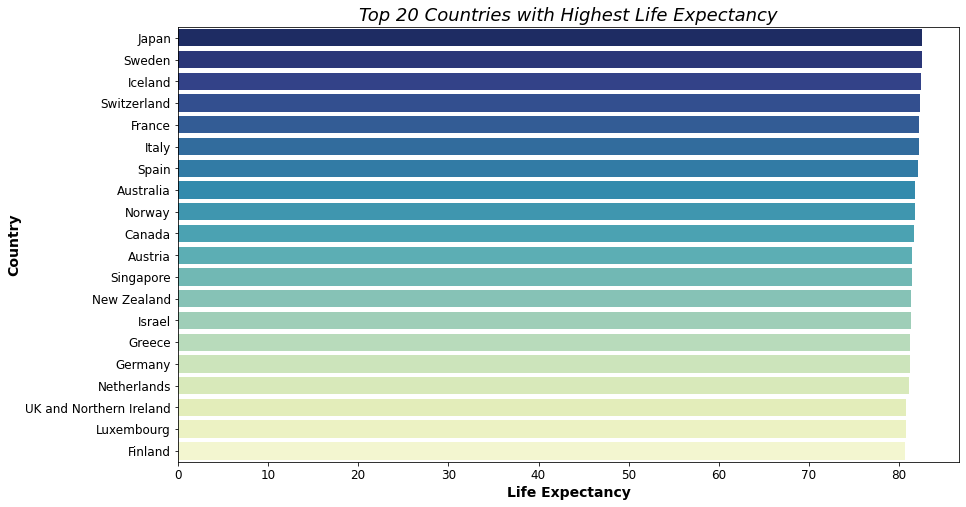

In [13]:
print("="*50)
print("Top 20 Countries with Most Life Expectancy")
print("="*50)
countries_20=data.groupby("Country").Life_expectancy.mean().sort_values(ascending =False).head(20)
order=countries_20.index
print(countries_20)


sns.barplot(y= "Country", x= "Life_expectancy", data= data, order= order, palette= "YlGnBu_r",ci=None)
plt.title("Top 20 Countries with Highest Life Expectancy", fontsize= 18, fontstyle="italic")
plt.xticks( fontsize= 12)
plt.yticks(fontsize=12)
plt.ylabel("Country", fontsize= 14, fontweight="bold")
plt.xlabel("Life Expectancy", fontsize=14, fontweight="bold")
plt.gcf().set_size_inches(14,8)
plt.savefig(r"C:\Users\jwala\AppData\Roaming\Microsoft\Windows\Start Menu\Programs\Python 3.9\Life Expectancy\static\top_20_life_expectancy.png")
plt.show()



Top 20 Countries with Least Life Expectancy
Country
Sierra Leone                46.11250
Central African Republic    48.51250
Lesotho                     48.78125
Angola                      49.01875
Malawi                      49.89375
Chad                        50.38750
Côte d'Ivoire               50.38750
Zimbabwe                    50.48750
Swaziland                   51.32500
Nigeria                     51.35625
Somalia                     53.31875
Mozambique                  53.39375
South Sudan                 53.87500
Zambia                      53.90625
Cameroon                    54.01875
Mali                        54.93750
Equatorial Guinea           55.31250
Guinea-Bissau               55.36875
Burundi                     55.53750
Burkina Faso                55.64375
Name: Life_expectancy, dtype: float64


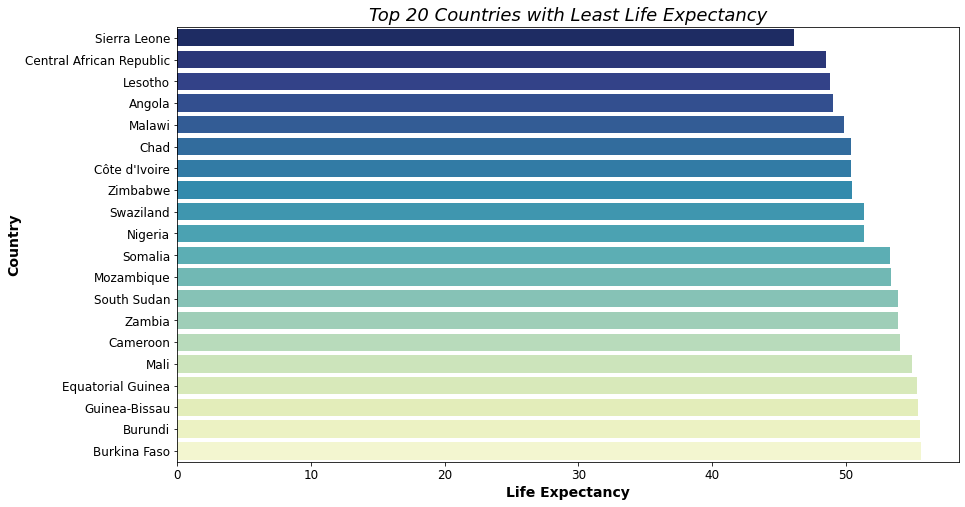

In [14]:
print("="*50)
print("Top 20 Countries with Least Life Expectancy")
print("="*50)
countries_20=data.groupby("Country").Life_expectancy.mean().sort_values(ascending =True).head(20)
order=countries_20.index
print(countries_20)

sns.barplot(y= "Country", x= "Life_expectancy", data= data, order= order, palette= "YlGnBu_r",ci=None)
plt.title("Top 20 Countries with Least Life Expectancy", fontsize= 18, fontstyle="italic")
plt.xticks( fontsize= 12)
plt.yticks(fontsize=12)
plt.ylabel("Country", fontsize= 14, fontweight="bold")
plt.xlabel("Life Expectancy", fontsize=14, fontweight="bold")
plt.gcf().set_size_inches(14,8)
plt.savefig(r"C:\Users\jwala\AppData\Roaming\Microsoft\Windows\Start Menu\Programs\Python 3.9\Life Expectancy\static\least_20_life_expectancy.png")
plt.show()

# Countries Vs Life Expectancy based on Status:

In [15]:
developed=data[data['Status']=='Developed'].Country.unique()
print("Number of Developed country",len(developed))

developing=data[data['Status']=='Developing'].Country.unique()
print("Number of Developing country",len(developing))


Number of Developed country 32
Number of Developing country 161


In [16]:
data.groupby("Status").Life_expectancy.mean()

Status
Developed     79.197852
Developing    67.111465
Name: Life_expectancy, dtype: float64

Inference : Life Expectancy rate in developed countries is more compared to Developing countries

  Developed countries

Top 10 Developed Countries Life Expectancy
Country
Japan          82.53750
Sweden         82.51875
Iceland        82.44375
Switzerland    82.33125
Italy          82.18750
Spain          82.06875
Australia      81.81250
Norway         81.79375
Austria        81.48125
Singapore      81.47500
Name: Life_expectancy, dtype: float64


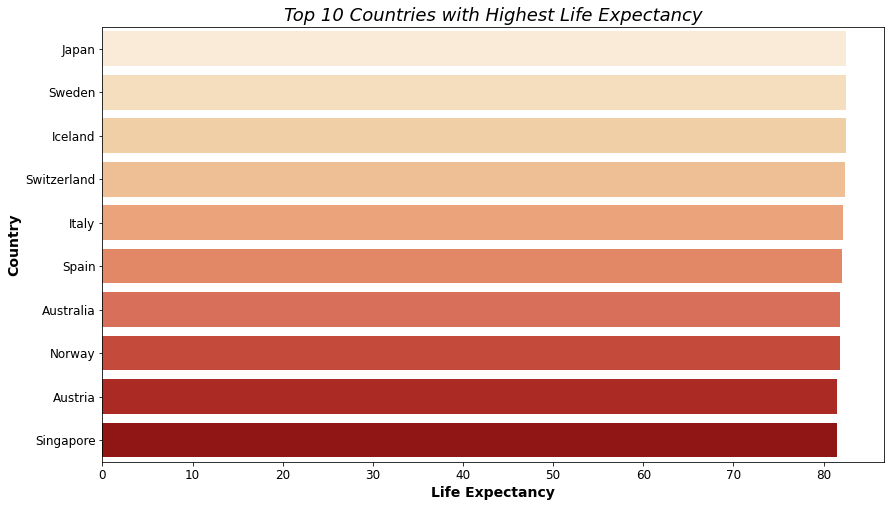

Last 10 Developed Countries in Life Expectancy
Country
Lithuania                   72.80625
Bulgaria                    72.85000
Latvia                      73.73125
Hungary                     73.82500
Romania                     74.05000
Slovakia                    74.75000
Poland                      75.65000
Croatia                     76.11875
Czechia                     76.76875
United States of America    78.06250
Name: Life_expectancy, dtype: float64


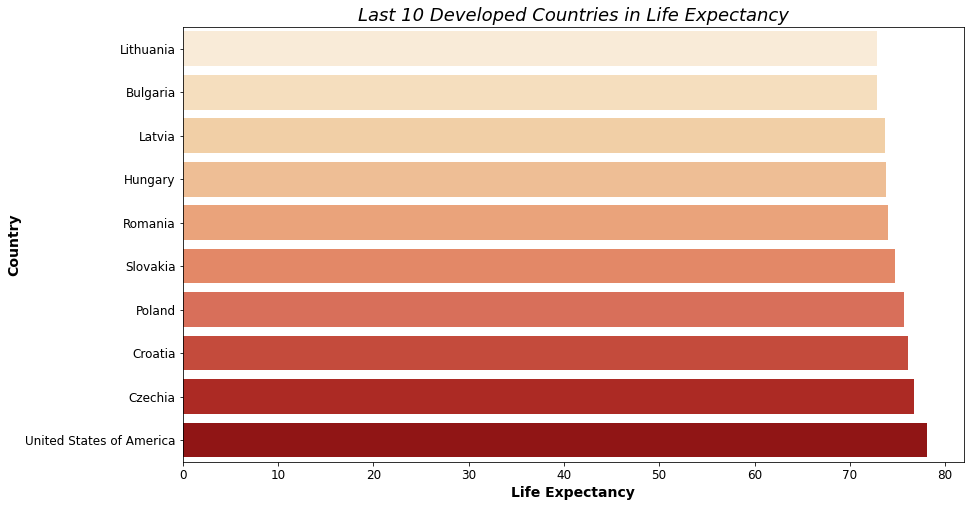

In [17]:
print("="*50)
print("Top 10 Developed Countries Life Expectancy")
print("="*50)

countries_10=data[data['Status']=='Developed'].groupby('Country').Life_expectancy.mean().sort_values(ascending = False).head(10)
order=countries_10.index
print(countries_10)


sns.barplot(y= "Country", x= "Life_expectancy", data= data, order= order, palette= "OrRd",ci=None)
plt.title("Top 10 Countries with Highest Life Expectancy", fontsize= 18, fontstyle="italic")
plt.xticks( fontsize= 12)
plt.yticks(fontsize=12)
plt.ylabel("Country", fontsize= 14, fontweight="bold")
plt.xlabel("Life Expectancy", fontsize=14, fontweight="bold")
plt.gcf().set_size_inches(14,8)
plt.savefig(r"C:\Users\jwala\AppData\Roaming\Microsoft\Windows\Start Menu\Programs\Python 3.9\Life Expectancy\static\top_10_developed_life_expectancy.png")
plt.show()



print("="*50)
print("Last 10 Developed Countries in Life Expectancy")
print("="*50)

countries_10=data[data['Status']=='Developed'].groupby('Country').Life_expectancy.mean().sort_values(ascending = True).head(10)
order=countries_10.index
print(countries_10)


sns.barplot(y= "Country", x= "Life_expectancy", data= data, order= order, palette= "OrRd",ci=None)
plt.title("Last 10 Developed Countries in Life Expectancy", fontsize= 18, fontstyle="italic")
plt.xticks( fontsize= 12)
plt.yticks(fontsize=12)
plt.ylabel("Country", fontsize= 14, fontweight="bold")
plt.xlabel("Life Expectancy", fontsize=14, fontweight="bold")
plt.gcf().set_size_inches(14,8)
plt.savefig(r"C:\Users\jwala\AppData\Roaming\Microsoft\Windows\Start Menu\Programs\Python 3.9\Life Expectancy\static\last_10_developed_life_expectancy.png")
plt.show()




Developing countries

Top 10 Developing Countries Life Expectancy
Country
France               82.21875
Canada               81.68750
Israel               81.30000
Greece               81.21875
Finland              80.71250
Republic of Korea    80.48750
Chile                79.45000
Costa Rica           78.59375
Cuba                 77.97500
Qatar                77.03125
Name: Life_expectancy, dtype: float64


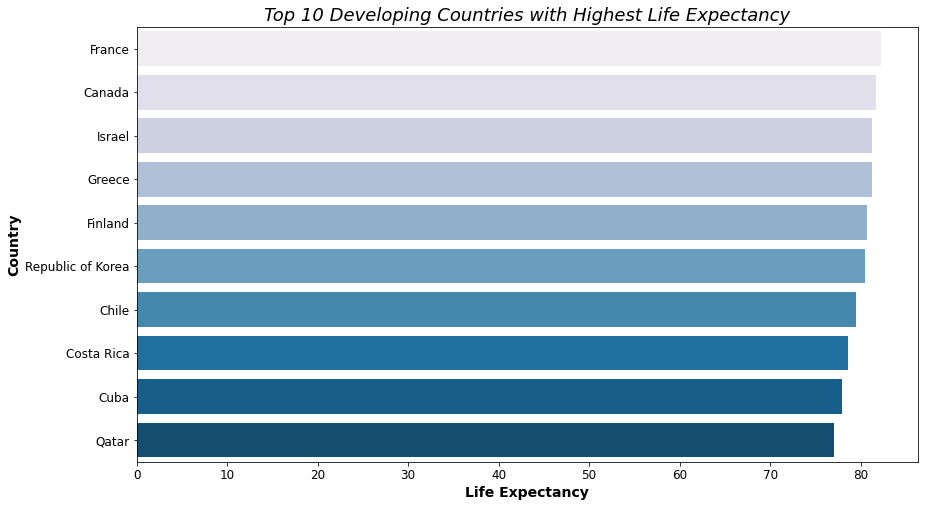

Last 10 Developing Countries in Life Expectancy
Country
Sierra Leone                46.11250
Central African Republic    48.51250
Lesotho                     48.78125
Angola                      49.01875
Malawi                      49.89375
Chad                        50.38750
Côte d'Ivoire               50.38750
Zimbabwe                    50.48750
Swaziland                   51.32500
Nigeria                     51.35625
Name: Life_expectancy, dtype: float64


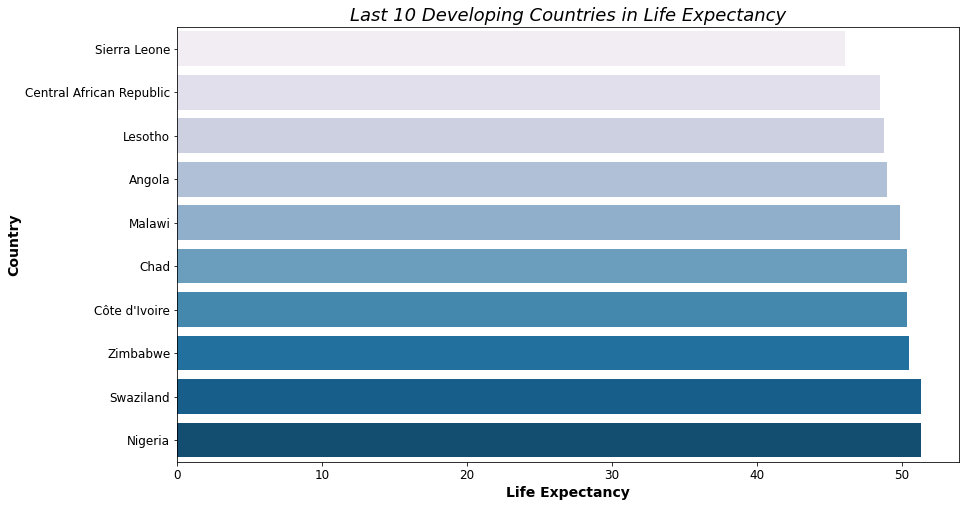

In [18]:
print("="*50)
print("Top 10 Developing Countries Life Expectancy")
print("="*50)

countries_10=data[data['Status']=='Developing'].groupby('Country').Life_expectancy.mean().sort_values(ascending = False).head(10)
order=countries_10.index
print(countries_10)


sns.barplot(y= "Country", x= "Life_expectancy", data= data, order= order, palette= "PuBu",ci=None)
plt.title("Top 10 Developing Countries with Highest Life Expectancy", fontsize= 18, fontstyle="italic")
plt.xticks( fontsize= 12)
plt.yticks(fontsize=12)
plt.ylabel("Country", fontsize= 14, fontweight="bold")
plt.xlabel("Life Expectancy", fontsize=14, fontweight="bold")
plt.gcf().set_size_inches(14,8)
plt.savefig(r"C:\Users\jwala\AppData\Roaming\Microsoft\Windows\Start Menu\Programs\Python 3.9\Life Expectancy\static\top_10_developing_life_expectancy.png")
plt.show()



print("="*50)
print("Last 10 Developing Countries in Life Expectancy")
print("="*50)

countries_10=data[data['Status']=='Developing'].groupby('Country').Life_expectancy.mean().sort_values(ascending = True).head(10)
order=countries_10.index
print(countries_10)


sns.barplot(y= "Country", x= "Life_expectancy", data= data, order= order, palette= "PuBu",ci=None)
plt.title("Last 10 Developing Countries in Life Expectancy", fontsize= 18, fontstyle="italic")
plt.xticks( fontsize= 12)
plt.yticks(fontsize=12)
plt.ylabel("Country", fontsize= 14, fontweight="bold")
plt.xlabel("Life Expectancy", fontsize=14, fontweight="bold")
plt.gcf().set_size_inches(14,8)
plt.savefig(r"C:\Users\jwala\AppData\Roaming\Microsoft\Windows\Start Menu\Programs\Python 3.9\Life Expectancy\static\last_10_developing_life_expectancy.png")
plt.show()




Country Vs Population

In [19]:
# To supress scientific notation 
pd.set_option('display.float_format', lambda x: '%.3f' % x)

print("="*50)
print("Top 10 Countries with Most Population")
print("="*50)
print(data.groupby("Country").Population.mean().sort_values(ascending =False).head(10))


print("="*50)
print("Top 10 Countries with Least Population")
print("="*50)
print(data.groupby("Country").Population.mean().sort_values(ascending =True).head(10))

Top 10 Countries with Most Population
Country
India                421467690.938
Indonesia            116555259.438
Brazil                88128071.250
Nigeria               70877003.062
Pakistan              69027961.812
Russian Federation    59762085.625
Ethiopia              43950760.750
Bangladesh            42985163.875
Germany               38757347.438
Philippines           37265400.312
Name: Population, dtype: float64
Top 10 Countries with Least Population
Country
Palau          292.000
Tuvalu        1819.000
Maldives      3334.250
Georgia      10152.375
Sri Lanka    10844.812
Tonga        26589.812
Israel       27862.875
Kiribati     35919.938
Seychelles   61543.812
Japan        97384.062
Name: Population, dtype: float64


Country Vs GDP

Top 10 Countries with Highest GDP
Country
Qatar                  40748.444
Kuwait                 31914.378
Canada                 29382.908
France                 26465.551
Finland                25268.650
United Arab Emirates   22110.367
Brunei Darussalam      19744.808
Israel                 18860.476
Greece                 16454.236
Barbados               12017.099
Name: GDP, dtype: float64


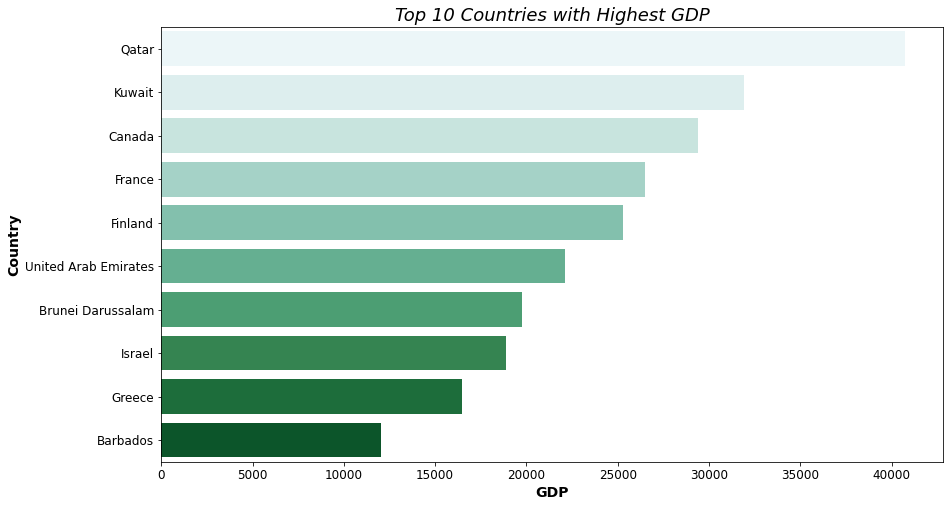

Last 10 Countries in GDP
Country
Nauru          136.183
Burundi        137.815
Malawi         237.504
Liberia        246.282
Eritrea        259.395
Niger          259.782
Ethiopia       264.971
Sierra Leone   271.506
Senegal        274.611
Guinea         279.465
Name: GDP, dtype: float64


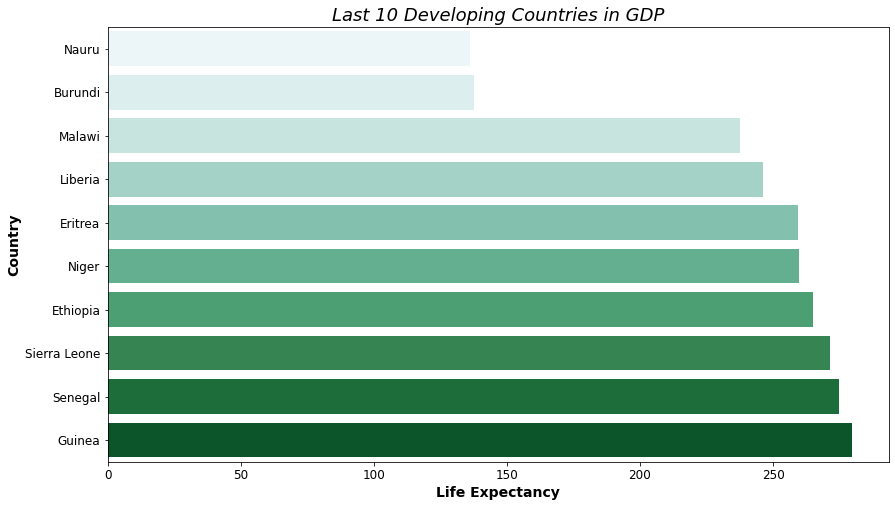

In [20]:
print("="*50)
print("Top 10 Countries with Highest GDP")
print("="*50)

countries_10=data[data['Status']=='Developing'].groupby('Country').GDP.mean().sort_values(ascending = False).head(10)
order=countries_10.index
print(countries_10)


sns.barplot(y= "Country", x= "GDP", data= data, order= order, palette= "BuGn",ci=None)
plt.title('Top 10 Countries with Highest GDP', fontsize= 18, fontstyle="italic")
plt.xticks( fontsize= 12)
plt.yticks(fontsize=12)
plt.ylabel("Country", fontsize= 14, fontweight="bold")
plt.xlabel("GDP", fontsize=14, fontweight="bold")
plt.gcf().set_size_inches(14,8)
plt.savefig(r"C:\Users\jwala\AppData\Roaming\Microsoft\Windows\Start Menu\Programs\Python 3.9\Life Expectancy\static\top_10_GDP.png")
plt.show()



print("="*50)
print("Last 10 Countries in GDP")
print("="*50)

countries_10=data[data['Status']=='Developing'].groupby('Country').GDP.mean().sort_values(ascending = True).head(10)
order=countries_10.index
print(countries_10)


sns.barplot(y= "Country", x= "GDP", data= data, order= order, palette= "BuGn",ci=None)
plt.title("Last 10 Developing Countries in GDP", fontsize= 18, fontstyle="italic")
plt.xticks( fontsize= 12)
plt.yticks(fontsize=12)
plt.ylabel("Country", fontsize= 14, fontweight="bold")
plt.xlabel("Life Expectancy", fontsize=14, fontweight="bold")
plt.gcf().set_size_inches(14,8)
plt.savefig(r"C:\Users\jwala\AppData\Roaming\Microsoft\Windows\Start Menu\Programs\Python 3.9\Life Expectancy\static\last_10_gdp.png")
plt.show()

List of countries with the highest healthcare spending.

In [21]:
data[['Country','Life_expectancy','Total_expenditure']][df['Total_expenditure'] >= 10].groupby('Country').mean().sort_values(by='Total_expenditure',ascending=False)

,Life_expectancy,Total_expenditure
Country,,
Marshall Islands,NaN,17.240
Tuvalu,NaN,16.610
United States of America,77.980,15.863
Micronesia (Federated States of),68.620,12.985
Kiribati,65.100,12.710
Maldives,78.050,12.445
Liberia,59.875,12.330
Republic of Moldova,71.425,12.143
Sierra Leone,45.718,12.078


#     

# Yearly How factors are varing

In [22]:
features = [i for i in data.columns if i not in ['Country','Year','Status']]

print(len(features))

print(features)

yearly=data[['Year','Life_expectancy']].groupby(['Year'],as_index=False).mean()
for i in range(1,len(features)):
    yearly[features[i]]=data[['Year',features[i]]].groupby(['Year'],as_index=False).mean()[features[i]]
print(yearly)


19
['Life_expectancy', 'Adult_Mortality', 'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B', 'Measles', 'BMI', 'under_five_deaths', 'Polio', 'Total_expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness', 'thinness_5-9_years', 'Income_composition_of_resources', 'Schooling']
    Year  Life_expectancy  Adult_Mortality  infant_deaths  Alcohol  \
0   2000           66.750          181.475         37.541    4.571   
1   2001           67.129          175.169         36.825    4.556   
2   2002           67.351          171.437         35.585    4.661   
3   2003           67.433          169.131         34.874    4.690   
4   2004           67.646          186.262         33.645    4.754   
5   2005           68.209          167.634         32.366    4.846   
6   2006           68.668          170.404         31.809    4.918   
7   2007           69.036          159.809         30.612    5.014   
8   2008           69.428          174.519         29.568    

In [23]:
print(yearly.columns)

Index(['Year', 'Life_expectancy', 'Adult_Mortality', 'infant_deaths',
       'Alcohol', 'percentage_expenditure', 'Hepatitis_B', 'Measles', 'BMI',
       'under_five_deaths', 'Polio', 'Total_expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness', 'thinness_5-9_years',
       'Income_composition_of_resources', 'Schooling'],
      dtype='object')


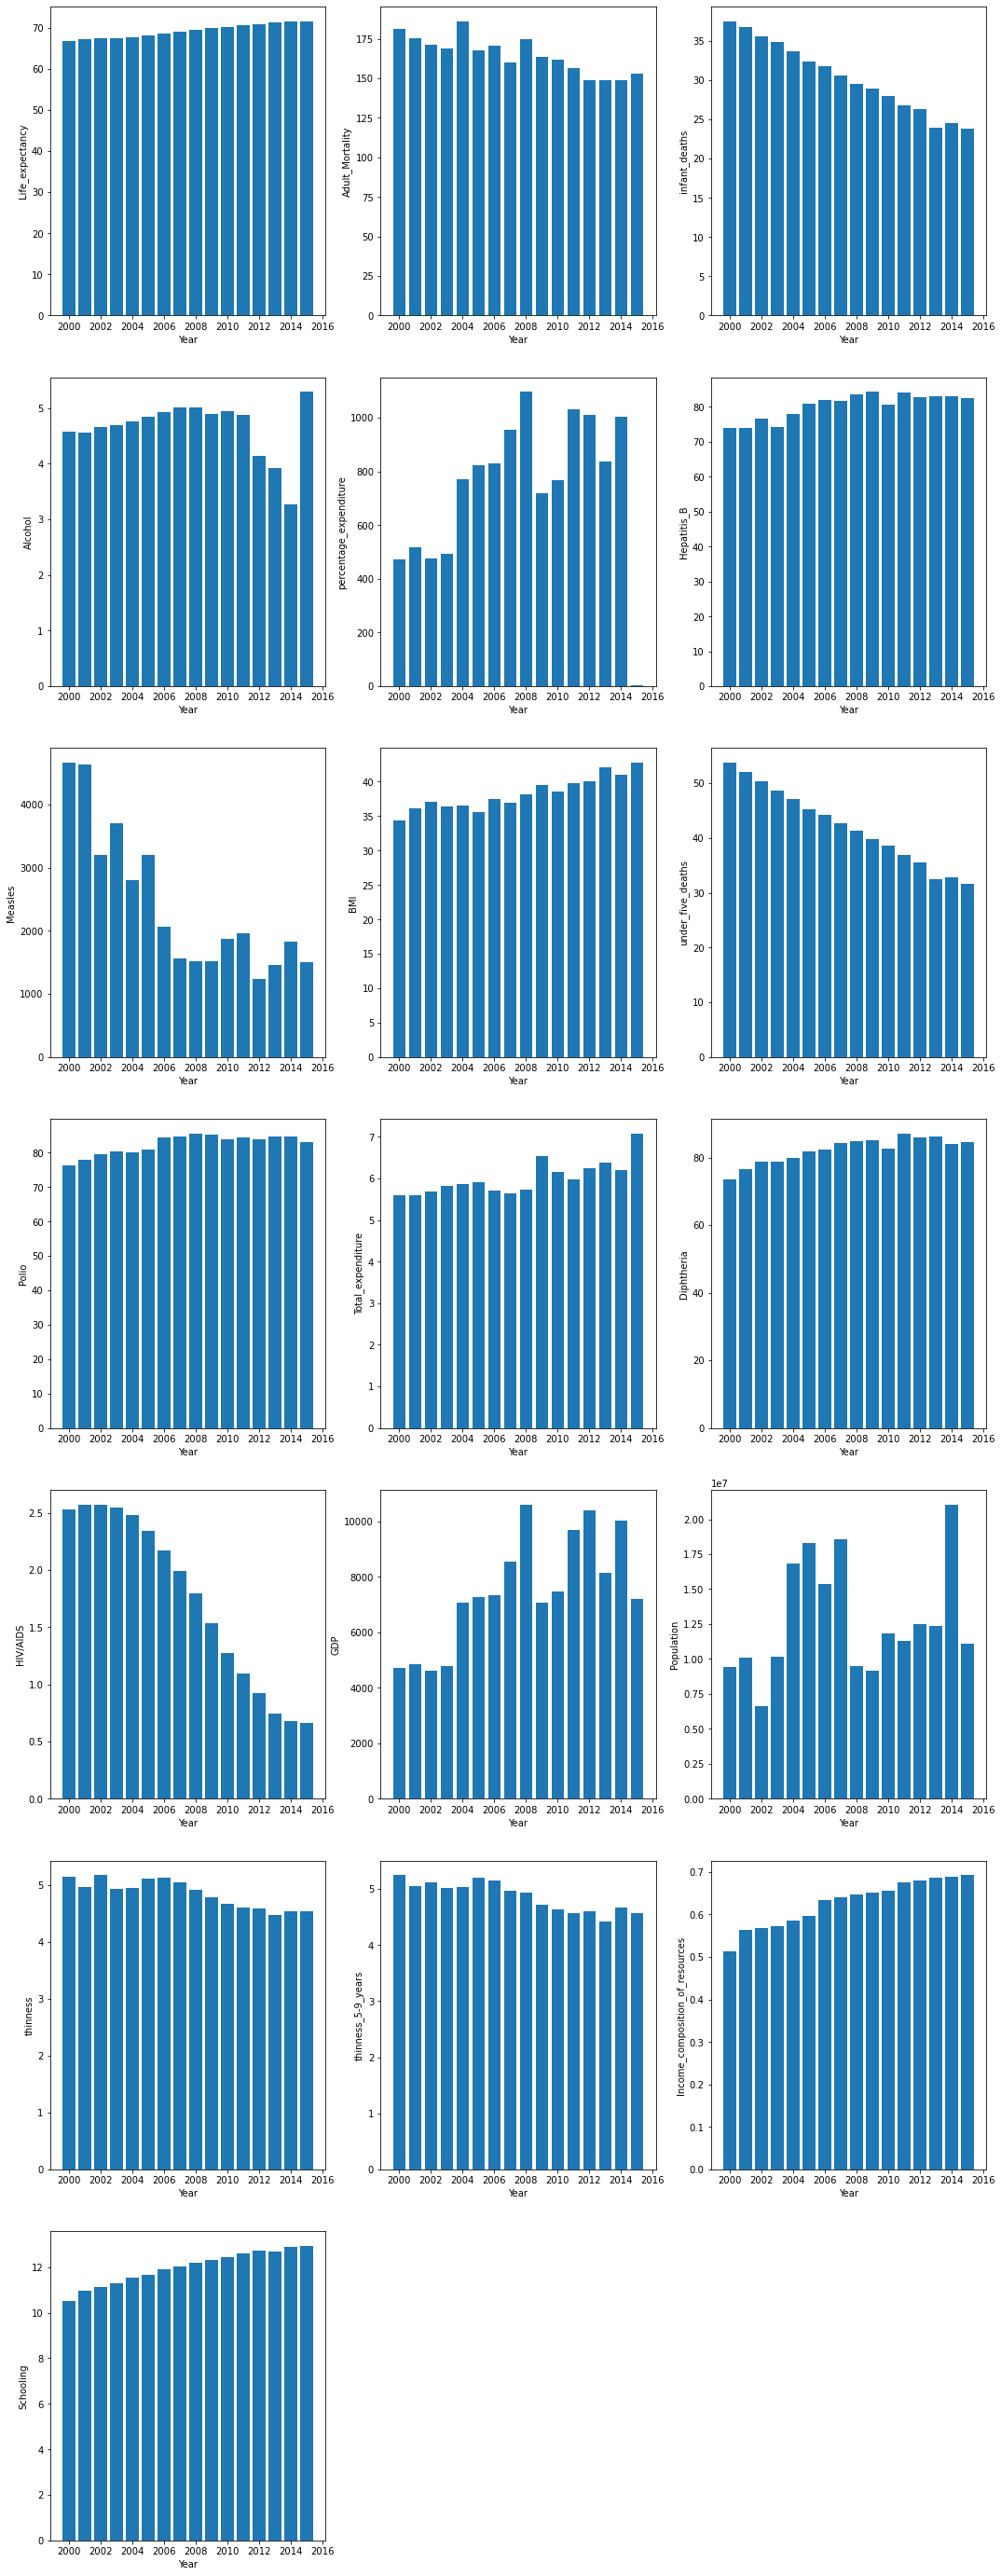

In [24]:
plt.figure(figsize=(18,50))

for index,i in enumerate(features):
    plt.subplot(7,3,index+1)
    plt.bar(yearly['Year'],yearly[i],label=i)
    plt.ylabel(i)
    plt.xlabel('Year')
plt.savefig("yearly_analysis.png",format='png')
plt.savefig(r"C:\Users\jwala\AppData\Roaming\Microsoft\Windows\Start Menu\Programs\Python 3.9\Life Expectancy\static\year_Vs_factors.png")
plt.show()

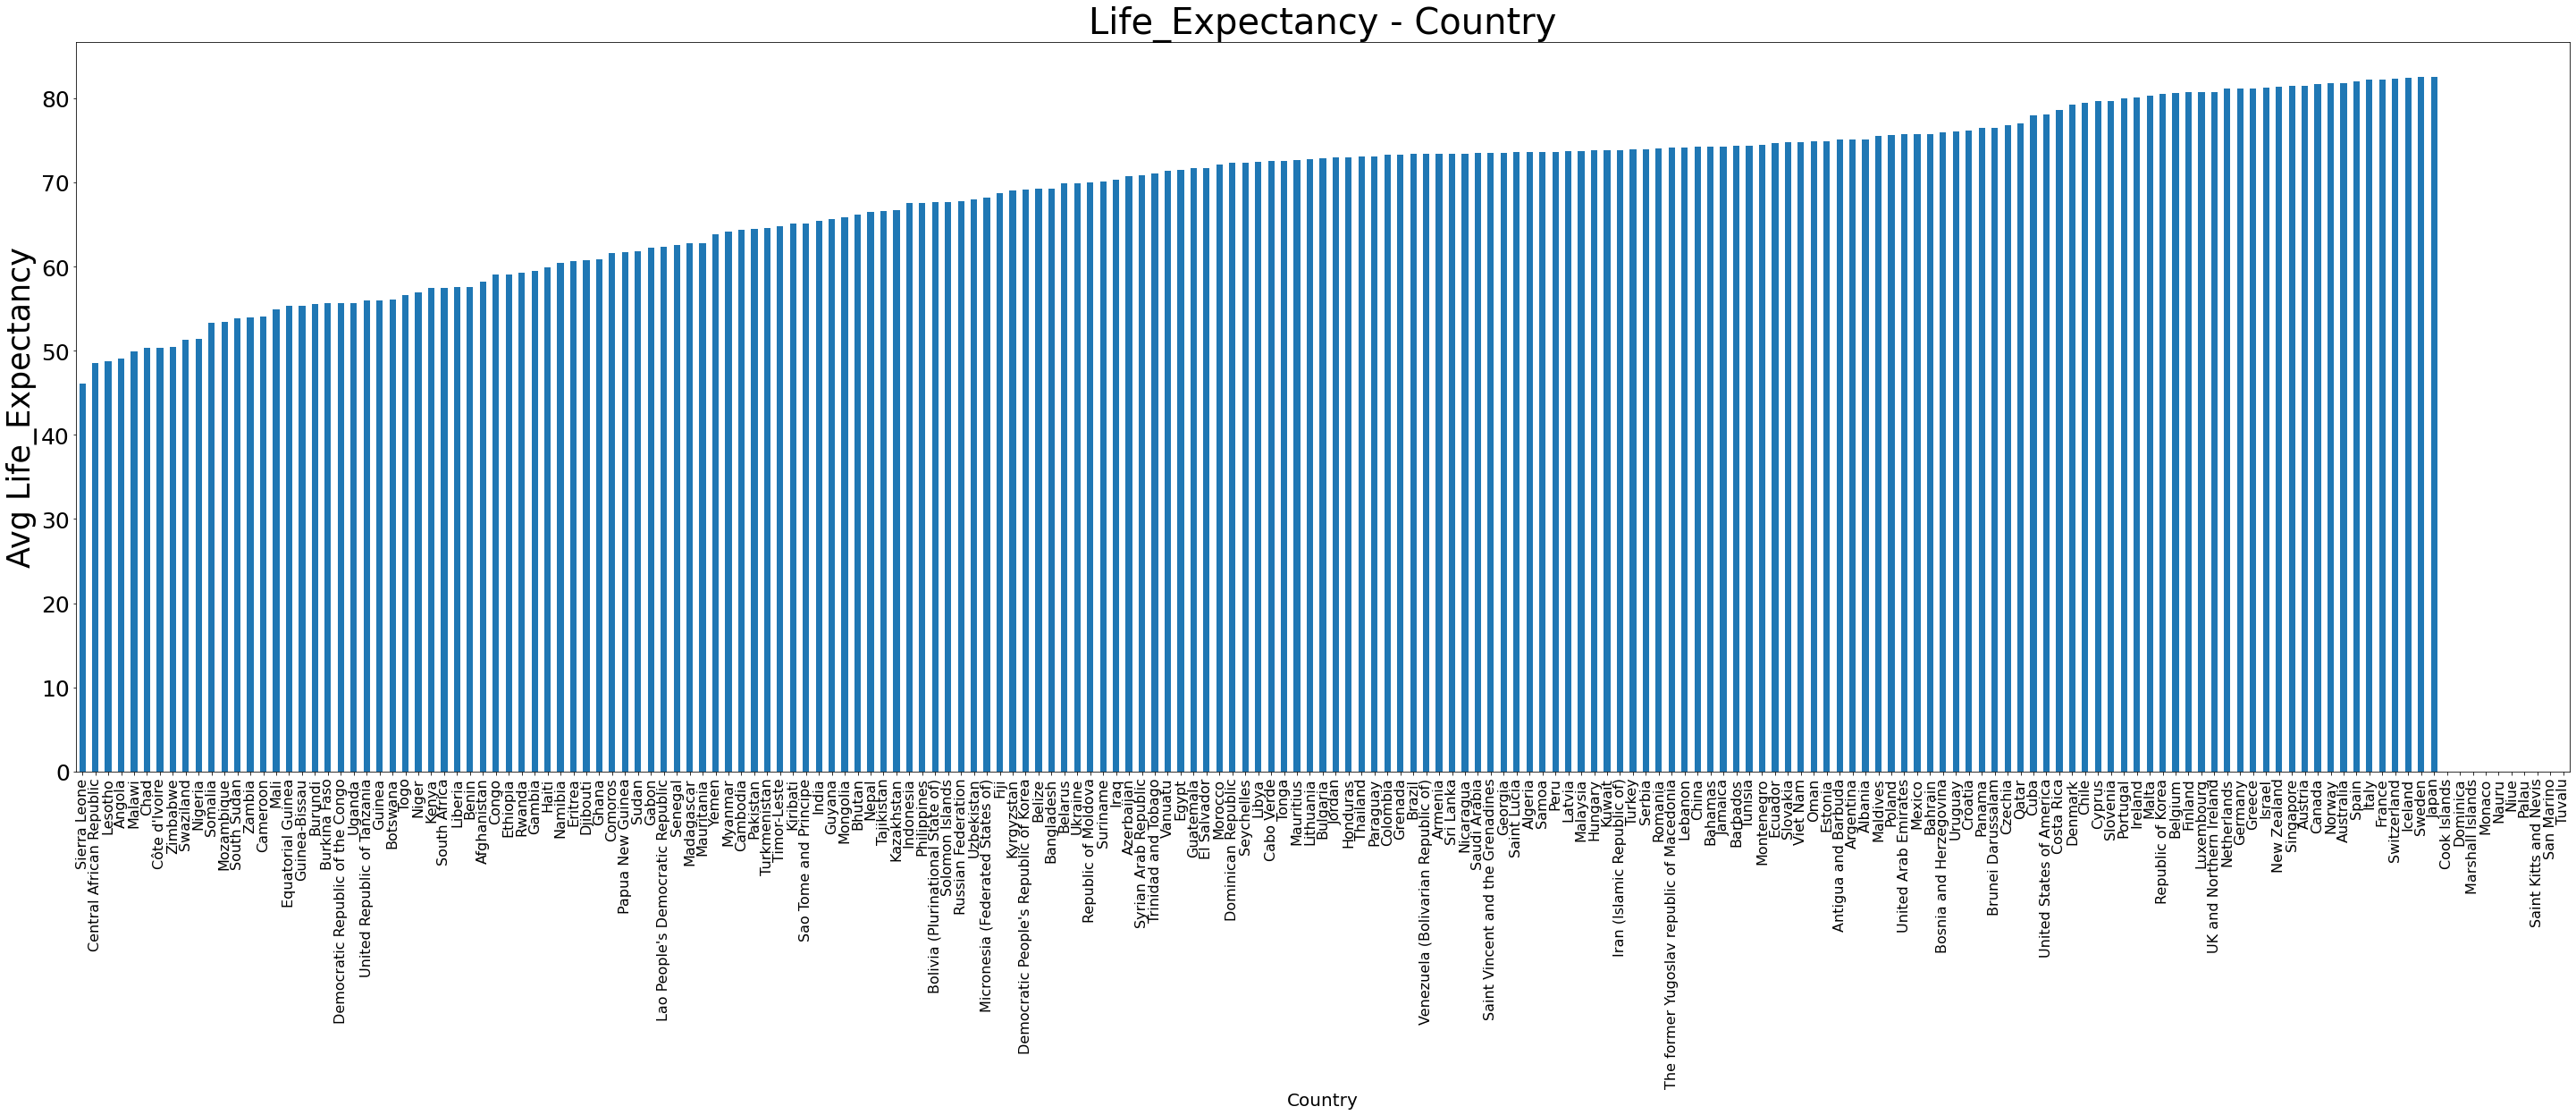

In [25]:
country_and_le = data.groupby('Country')['Life_expectancy'].mean().sort_values(ascending=True)
country_and_le.plot(kind='bar', figsize=(50,15), fontsize=25)
plt.title("Life_Expectancy - Country",fontsize=40)
plt.xlabel("Country",fontsize=20)
plt.ylabel("Avg Life_Expectancy",fontsize=35)
plt.xticks(fontsize=16, rotation=90)
plt.savefig(r"C:\Users\jwala\AppData\Roaming\Microsoft\Windows\Start Menu\Programs\Python 3.9\Life Expectancy\static\Avg Life expectancy.png")
plt.show()

Removing missing values

In [26]:
def imputer(data, feature, method):
    if method== "mode":
        data[feature]=data[feature].fillna(data[feature].mode()[0])
    elif method== "median":
        data[feature]=data[feature].fillna(data[feature].median())
    else:
        data[feature]=data[feature].fillna(data[feature].mean())

In [27]:
features_missing= data.columns[data.isna().any()]
print(features_missing)
for feature in features_missing:
    imputer(data= data, feature= feature, method= "mean")

Index(['Life_expectancy', 'Adult_Mortality', 'Alcohol', 'Hepatitis_B', 'BMI',
       'Polio', 'Total_expenditure', 'Diphtheria', 'GDP', 'Population',
       'thinness', 'thinness_5-9_years', 'Income_composition_of_resources',
       'Schooling'],
      dtype='object')


In [28]:
top_exp_coun=data[['Country','Life_expectancy','Total_expenditure']][df['Total_expenditure'] >= 10].groupby('Country',as_index=False).mean().sort_values(by='Total_expenditure',ascending=False)
print(len(top_exp_coun))

25


71.31272180824641


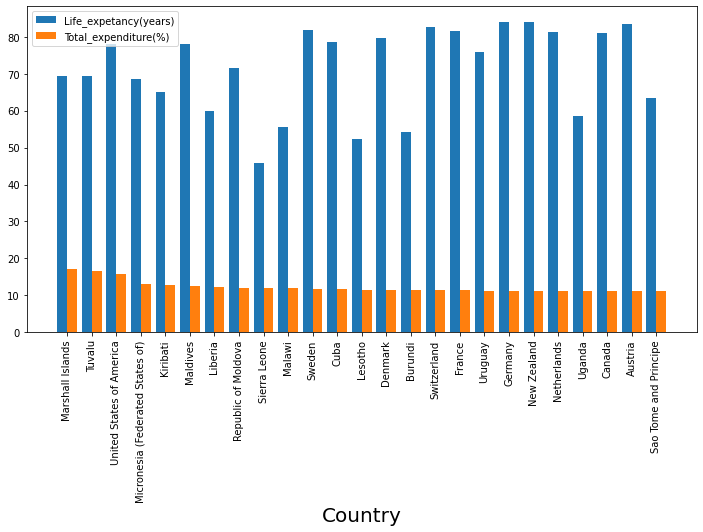

In [29]:
import matplotlib.pyplot as plt
import numpy as np
  
# create data
x = np.arange(25)
y1 = top_exp_coun['Life_expectancy']
print(y1.mean())
y2 = top_exp_coun['Total_expenditure']
width = 0.40
  
# plot data in grouped manner of bar type
plt.bar(x-0.2, y1, width)
plt.bar(x+0.2, y2, width)
plt.xticks(x, top_exp_coun['Country'],rotation=90)
plt.gcf().set_size_inches(12,6)
plt.xlabel("Country",fontsize=20)
plt.legend(["Life_expetancy(years)", "Total_expenditure(%)"])
plt.savefig(r"C:\Users\jwala\AppData\Roaming\Microsoft\Windows\Start Menu\Programs\Python 3.9\Life Expectancy\static\top_expenditure_countries.png")

In [30]:
missing_values= data.isna().sum().reset_index()
missing_values.columns= ["Features", "Missing_Values"]
missing_values["Missing_Percent"]= round(missing_values.Missing_Values/len(data)*100,2)
print(missing_values)

                           Features  Missing_Values  Missing_Percent
0                           Country               0            0.000
1                              Year               0            0.000
2                            Status               0            0.000
3                   Life_expectancy               0            0.000
4                   Adult_Mortality               0            0.000
5                     infant_deaths               0            0.000
6                           Alcohol               0            0.000
7            percentage_expenditure               0            0.000
8                       Hepatitis_B               0            0.000
9                           Measles               0            0.000
10                              BMI               0            0.000
11                under_five_deaths               0            0.000
12                            Polio               0            0.000
13                Total_expenditur

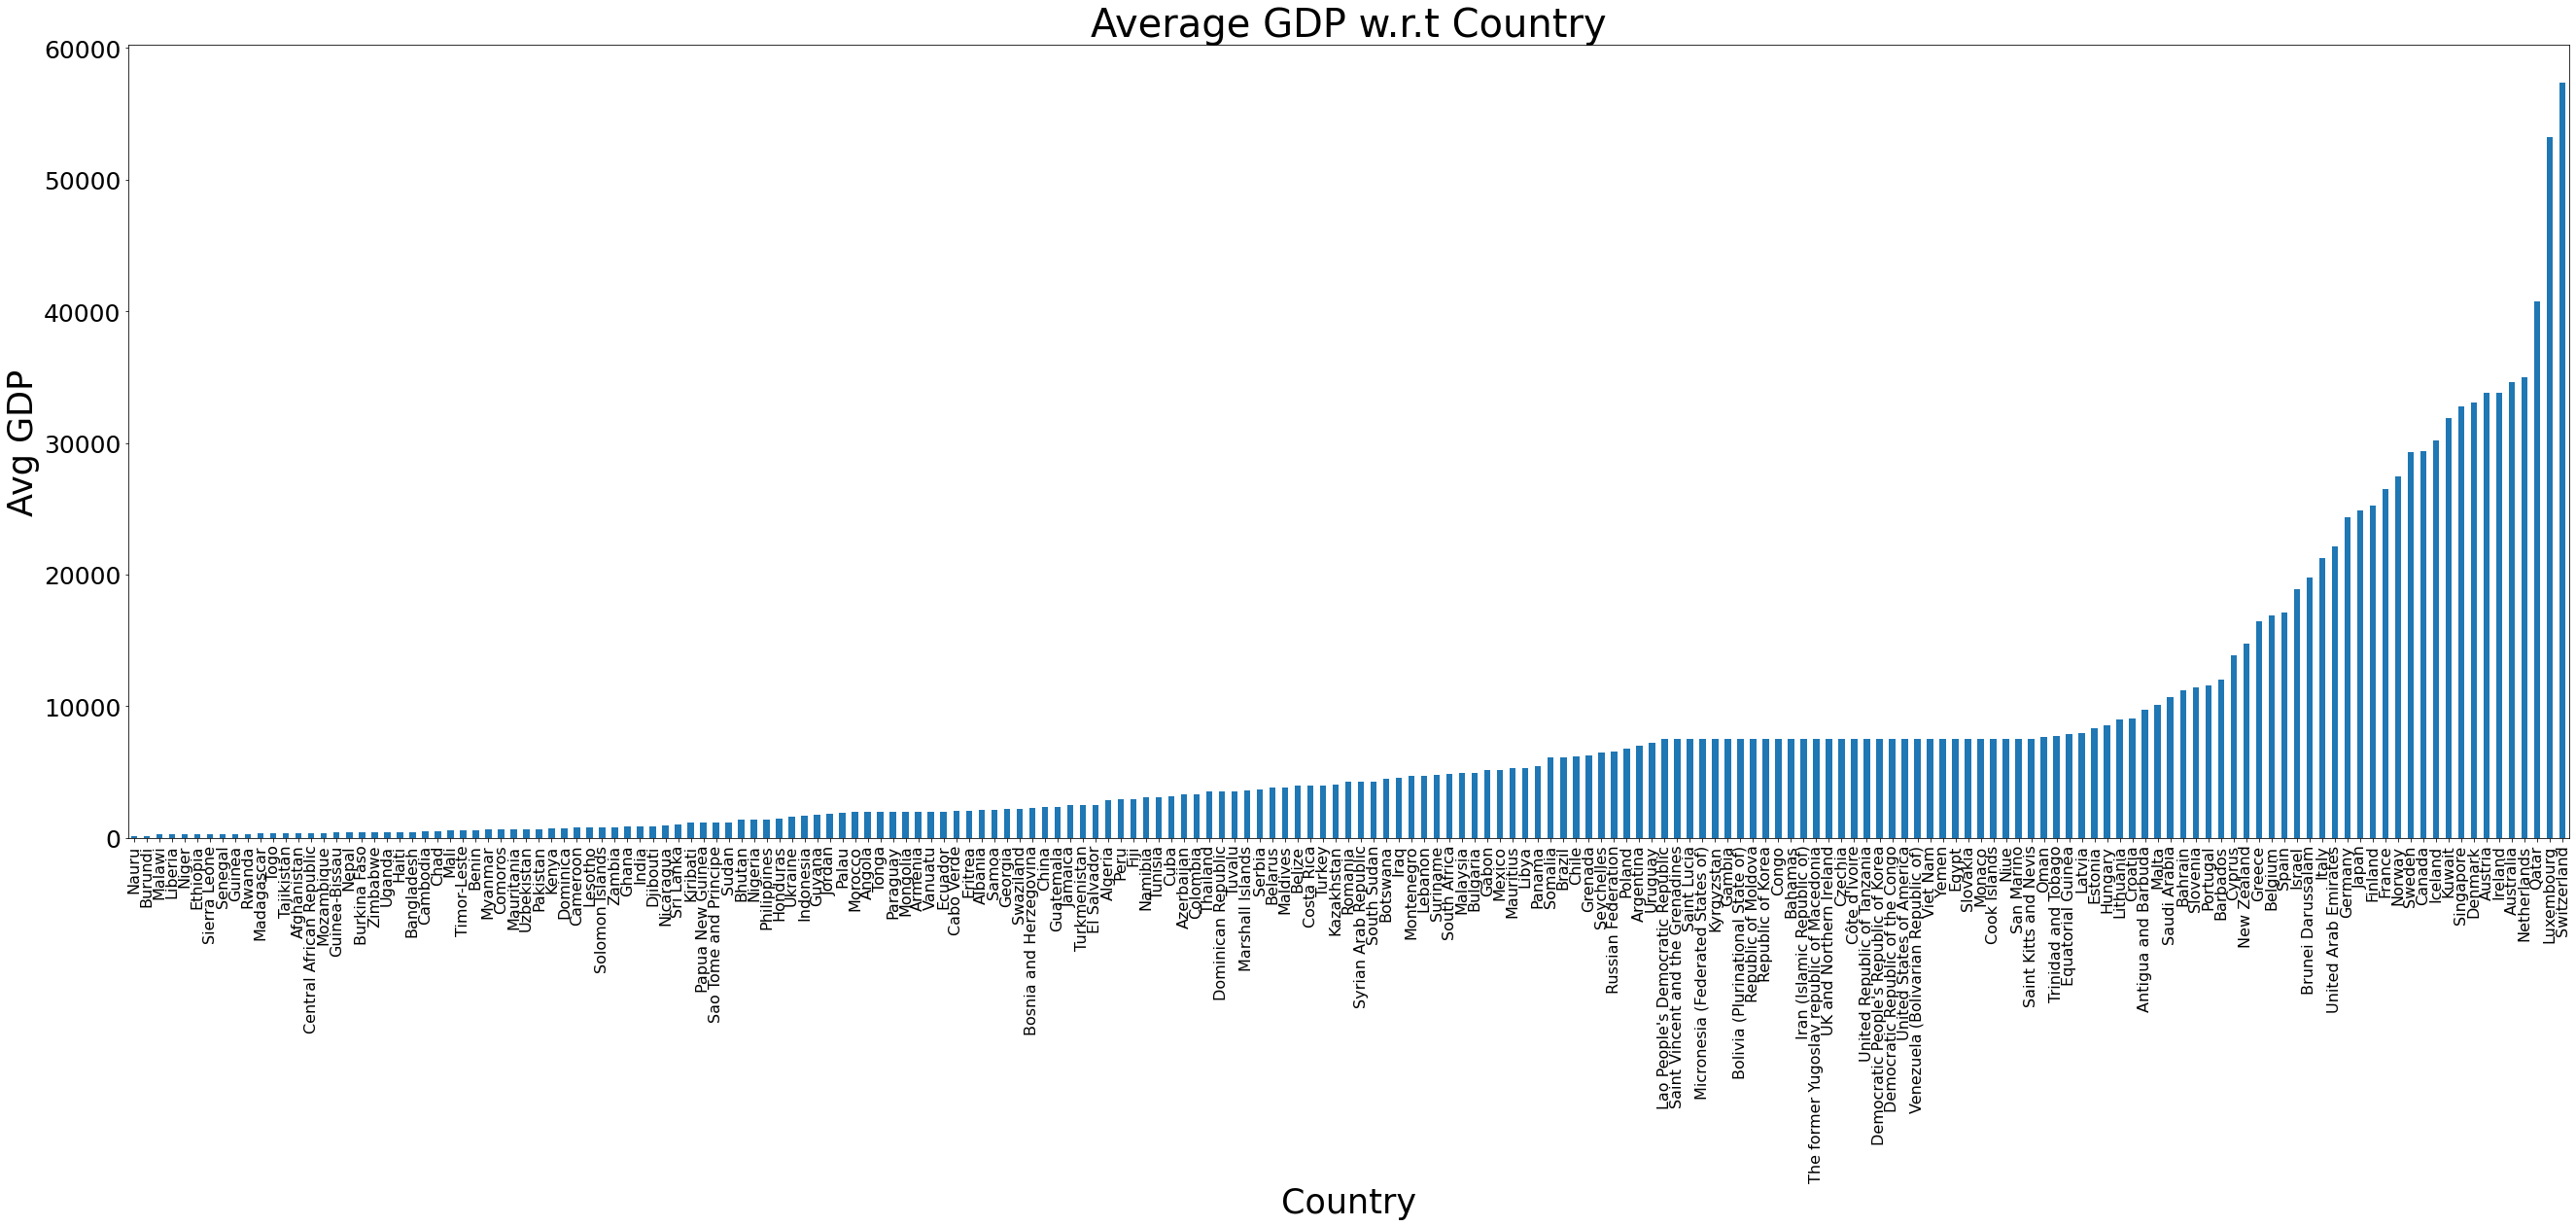

In [31]:
le_country = data.groupby('Country')['GDP'].mean().sort_values(ascending=True)
le_country.plot(kind='bar', figsize=(45,15), fontsize=25)
plt.title("Average GDP w.r.t Country",fontsize=40)
plt.xlabel("Country",fontsize=35)
plt.ylabel("Avg GDP",fontsize=35)
plt.xticks(fontsize=16, rotation=90)
plt.savefig(r"C:\Users\jwala\AppData\Roaming\Microsoft\Windows\Start Menu\Programs\Python 3.9\Life Expectancy\static\Avg GDP.png")
plt.show()

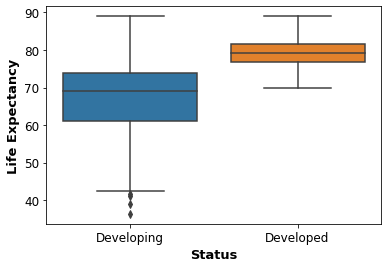

In [32]:
sns.boxplot(x= data["Status"], y= y,fliersize=5)
plt.xticks(fontsize= 12)
plt.yticks(fontsize=12)
plt.ylabel("Life Expectancy", fontsize= 13, fontweight="bold")
plt.xlabel("Status", fontsize=13, fontweight="bold")
plt.savefig(r"C:\Users\jwala\AppData\Roaming\Microsoft\Windows\Start Menu\Programs\Python 3.9\Life Expectancy\static\box_plot_status.png")
plt.show()

median (Q2/50th Percentile): the middle value of the dataset.

first quartile (Q1/25th Percentile): the middle number between the smallest number (not the “minimum”) and the median of the dataset.

third quartile (Q3/75th Percentile): the middle value between the median and the highest value (not the “maximum”) of the dataset.

interquartile range (IQR): 25th to the 75th percentile.

whiskers (shown in blue)

outliers (shown as green circles)

“maximum”: Q3 + 1.5*IQR

“minimum”: Q1 -1.5*IQR

#   

Life expectancy Vs all features based on status 

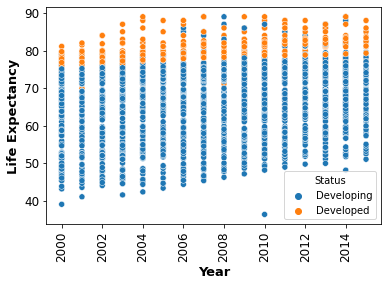

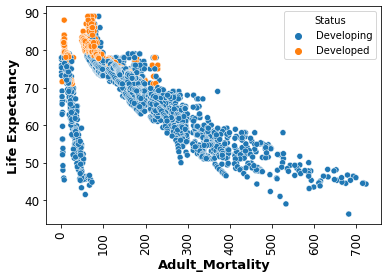

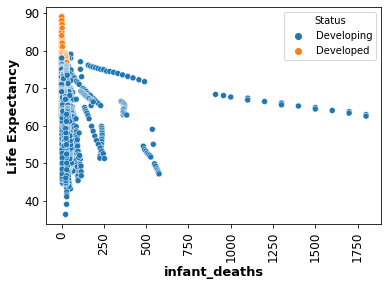

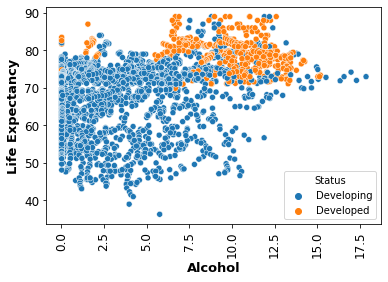

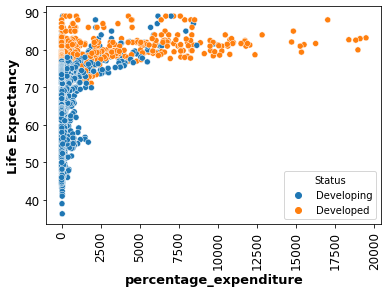

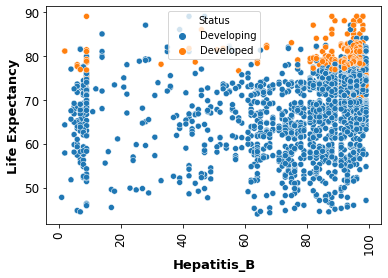

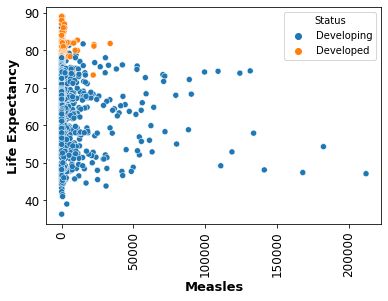

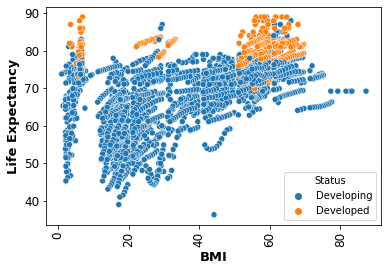

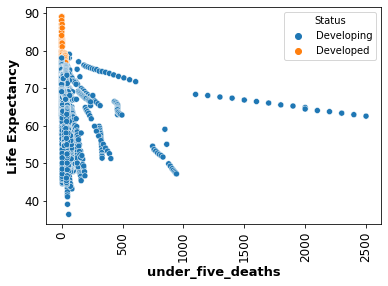

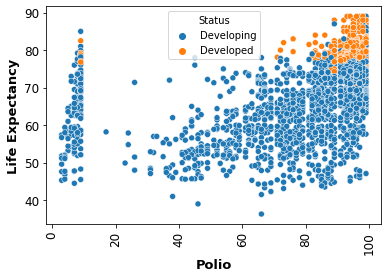

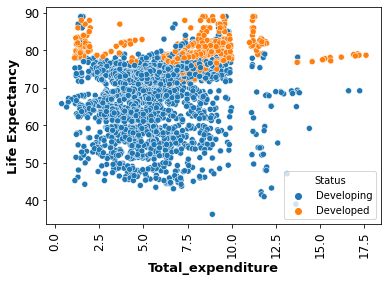

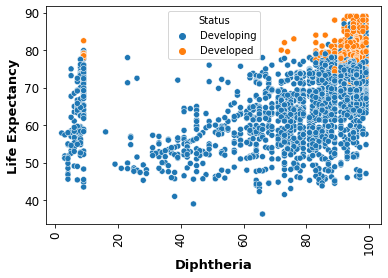

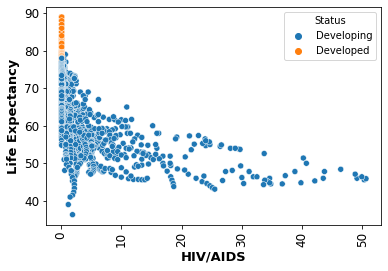

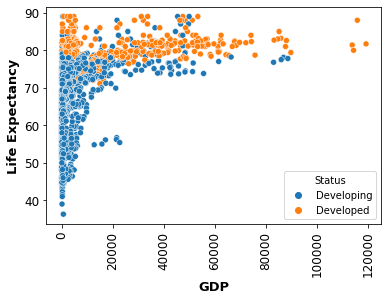

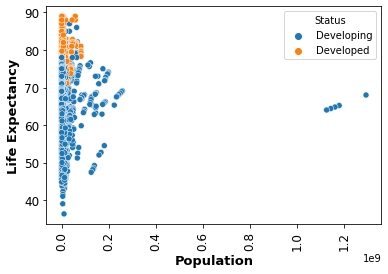

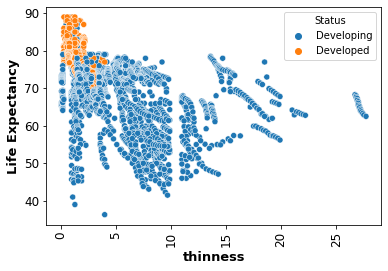

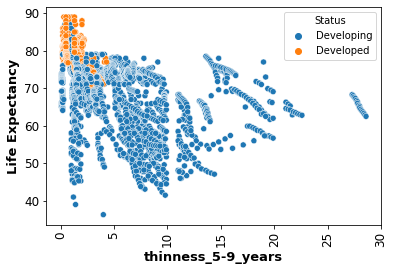

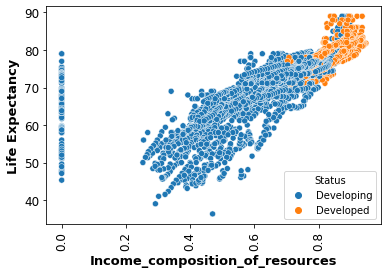

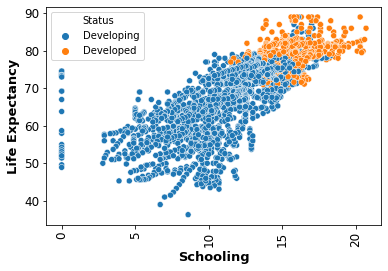

In [33]:
for feature in numerical.columns:        
    sns.scatterplot(x= numerical[feature], y= y, hue= categorical.Status)
    plt.xticks(rotation=90, fontsize= 12)
    plt.yticks(fontsize=12)
    plt.ylabel("Life Expectancy", fontsize= 13, fontweight="bold")
    plt.xlabel(feature, fontsize=13, fontweight="bold")
    if feature=='HIV/AIDS':
        feature='HIV'
    plt.savefig(r"C:\Users\jwala\AppData\Roaming\Microsoft\Windows\Start Menu\Programs\Python 3.9\Life Expectancy\static\\"+feature+" Vs "+"Year.png")
    plt.show()

# Correlation between Features

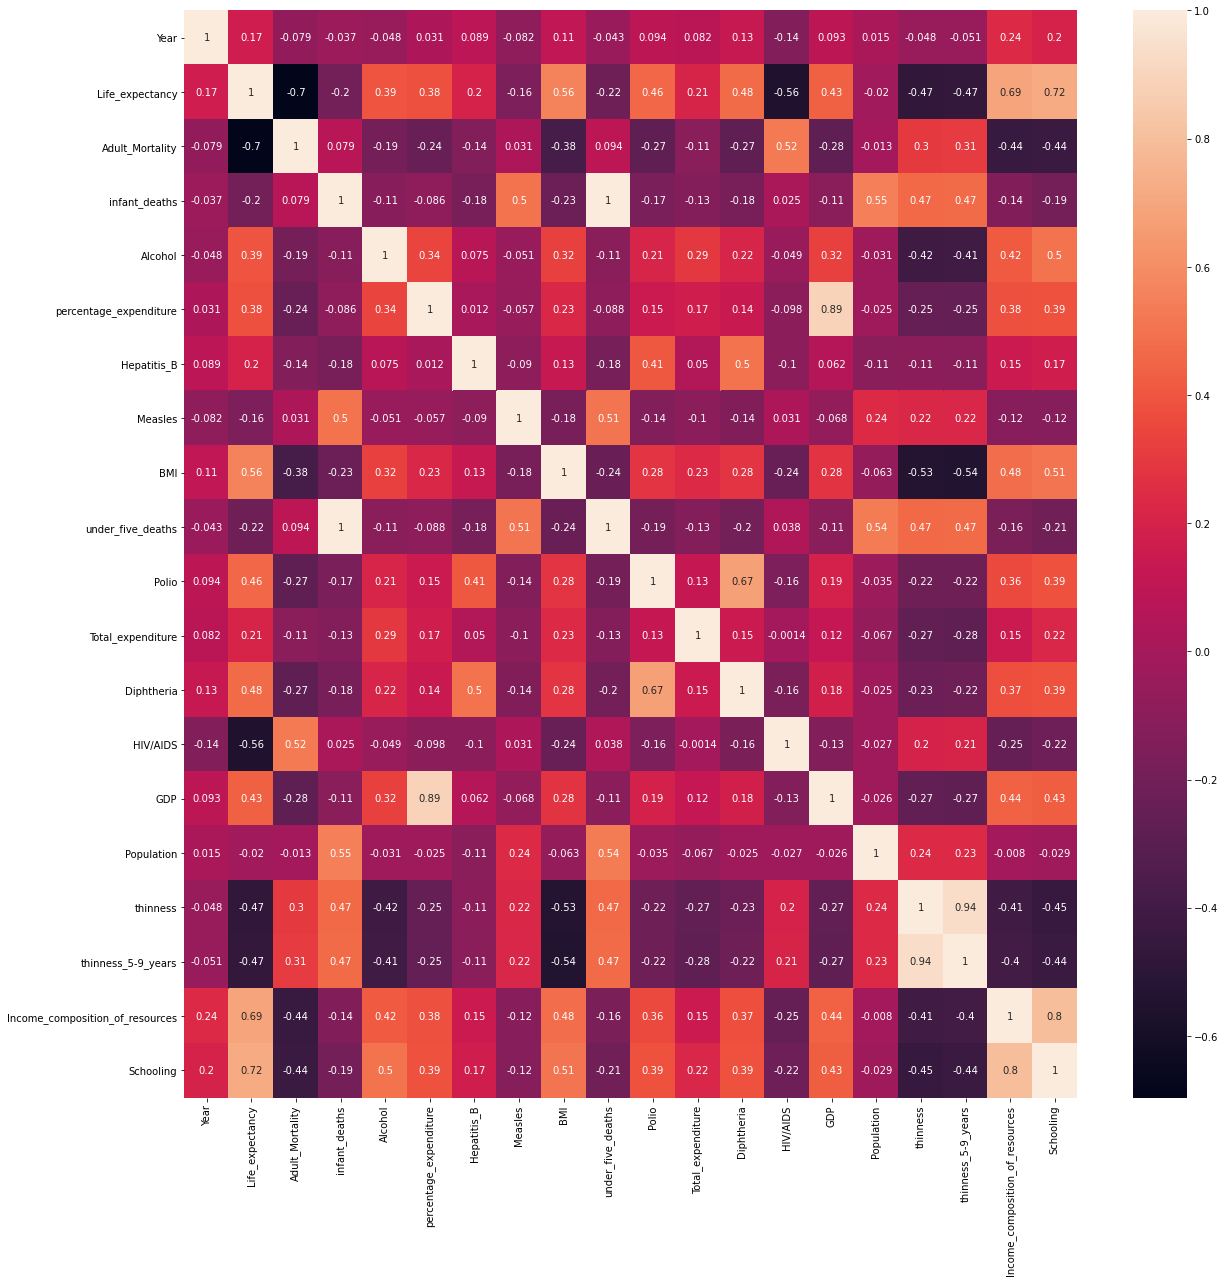

In [34]:
fig, ax = plt.subplots(figsize = (20,20)) 

corr = data.corr() 
sns.heatmap(corr, annot = True)
plt.savefig(r"C:\Users\jwala\AppData\Roaming\Microsoft\Windows\Start Menu\Programs\Python 3.9\Life Expectancy\static\Correlation_between_factors.png")

The following features are highly correlated:

Under 5 deaths <---> Infant Deaths
Thinness 5-9 <---> Thinness 1-19
We check if Life_Expectancy has a correlation of 1 with any other feature in the dataset. If yes, we need to drop that feature as it will introduce DATA LEAKAGE (intercorrelation. That one feature can be used to predict the target column)

In [35]:
print(corr['Life_expectancy'].sort_values(ascending=False))

Life_expectancy                    1.000
Schooling                          0.715
Income_composition_of_resources    0.692
BMI                                0.559
Diphtheria                         0.475
Polio                              0.462
GDP                                0.430
Alcohol                            0.392
percentage_expenditure             0.382
Total_expenditure                  0.208
Hepatitis_B                        0.204
Year                               0.170
Population                        -0.020
Measles                           -0.158
infant_deaths                     -0.197
under_five_deaths                 -0.223
thinness_5-9_years                -0.467
thinness                          -0.472
HIV/AIDS                          -0.556
Adult_Mortality                   -0.696
Name: Life_expectancy, dtype: float64


Life_expectancy is depending on schooling and Incomne_composition_of_resources

# Proving correlation between Life Expectancy and schooling, Income composition of resources

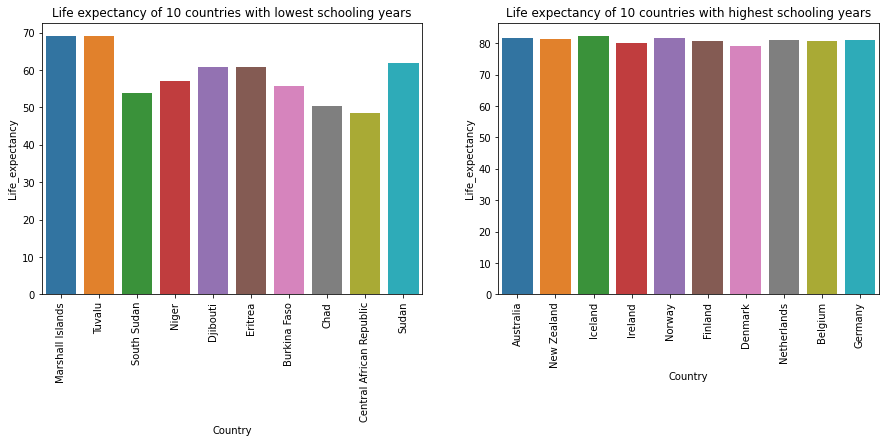

In [36]:
low_school = data.groupby('Country').mean().nsmallest(10, ['Schooling']).reset_index()
high_school = data.groupby('Country').mean().nlargest(10, ['Schooling']).reset_index()
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
school_low = sns.barplot(data = low_school, x = low_school.Country, y = low_school['Life_expectancy'])
school_low.set_title("Life expectancy of 10 countries with lowest schooling years")
school_low.set_xticklabels(school_low.get_xticklabels(), rotation = 90)

plt.subplot(1,2,2)
school_high = sns.barplot(data = high_school, x = high_school.Country, y = high_school['Life_expectancy'])
school_high.set_title("Life expectancy of 10 countries with highest schooling years")
school_high.set_xticklabels(school_high.get_xticklabels(), rotation = 90)

plt.savefig(r"C:\Users\jwala\AppData\Roaming\Microsoft\Windows\Start Menu\Programs\Python 3.9\Life Expectancy\static\Life_exp Vs country based on schooling.png")
plt.show()


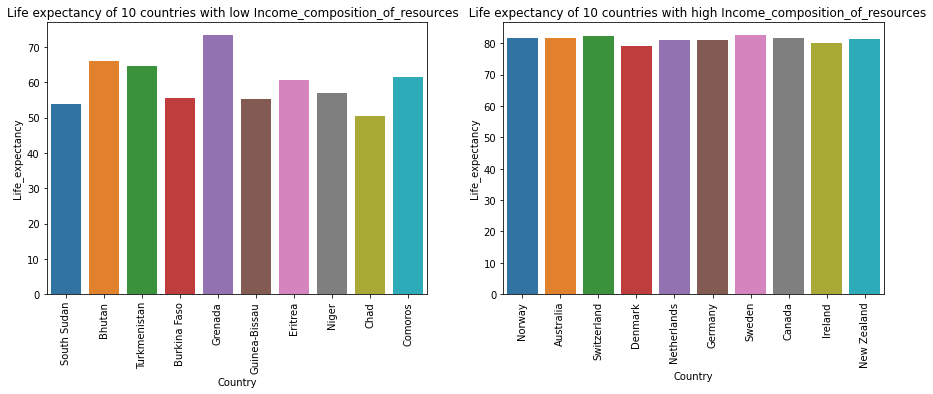

In [37]:
low_income_com = data.groupby('Country').mean().nsmallest(10, ['Income_composition_of_resources']).reset_index()
high_income_com = data.groupby('Country').mean().nlargest(10, ['Income_composition_of_resources']).reset_index()


plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
income_com_low = sns.barplot(data = low_income_com, x = low_income_com.Country, y = low_income_com['Life_expectancy'])
income_com_low.set_title("Life expectancy of 10 countries with low Income_composition_of_resources  ")
income_com_low.set_xticklabels(income_com_low.get_xticklabels(), rotation = 90)

plt.subplot(1,2,2)
income_com_high = sns.barplot(data = high_income_com, x = high_income_com.Country, y = high_income_com['Life_expectancy'])
income_com_high.set_title("  Life expectancy of 10 countries with high Income_composition_of_resources")
income_com_high.set_xticklabels(income_com_high.get_xticklabels(), rotation = 90)

plt.savefig(r"C:\Users\jwala\AppData\Roaming\Microsoft\Windows\Start Menu\Programs\Python 3.9\Life Expectancy\static\Life_exp Vs Income_composition_of_resources.png")
plt.show()


In [38]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

# LabelEncoder is used to normalise and convert into numeric type
numerical_with_life_exp= data.select_dtypes(exclude= "O")
print(numerical_with_life_exp)
features=numerical_with_life_exp.columns
for i in features:
    data[i] = le.fit_transform(data[i])

      Year  Life_expectancy  Adult_Mortality  infant_deaths  Alcohol  \
0     2015           65.000          263.000             62    0.010   
1     2014           59.900          271.000             64    0.010   
2     2013           59.900          268.000             66    0.010   
3     2012           59.500          272.000             69    0.010   
4     2011           59.200          275.000             71    0.010   
...    ...              ...              ...            ...      ...   
2933  2004           44.300          723.000             27    4.360   
2934  2003           44.500          715.000             26    4.060   
2935  2002           44.800           73.000             25    4.430   
2936  2001           45.300          686.000             25    1.720   
2937  2000           46.000          665.000             24    1.680   

      percentage_expenditure  Hepatitis_B  Measles    BMI  under_five_deaths  \
0                     71.280       65.000     1154 19.1

# Detection of Outliers

Year
Life_expectancy
Adult_Mortality
infant_deaths
Alcohol
percentage_expenditure
Hepatitis_B
Measles
BMI
under_five_deaths
Polio
Total_expenditure
Diphtheria
HIV/AIDS
GDP
Population
thinness
thinness_5-9_years
Income_composition_of_resources
Schooling


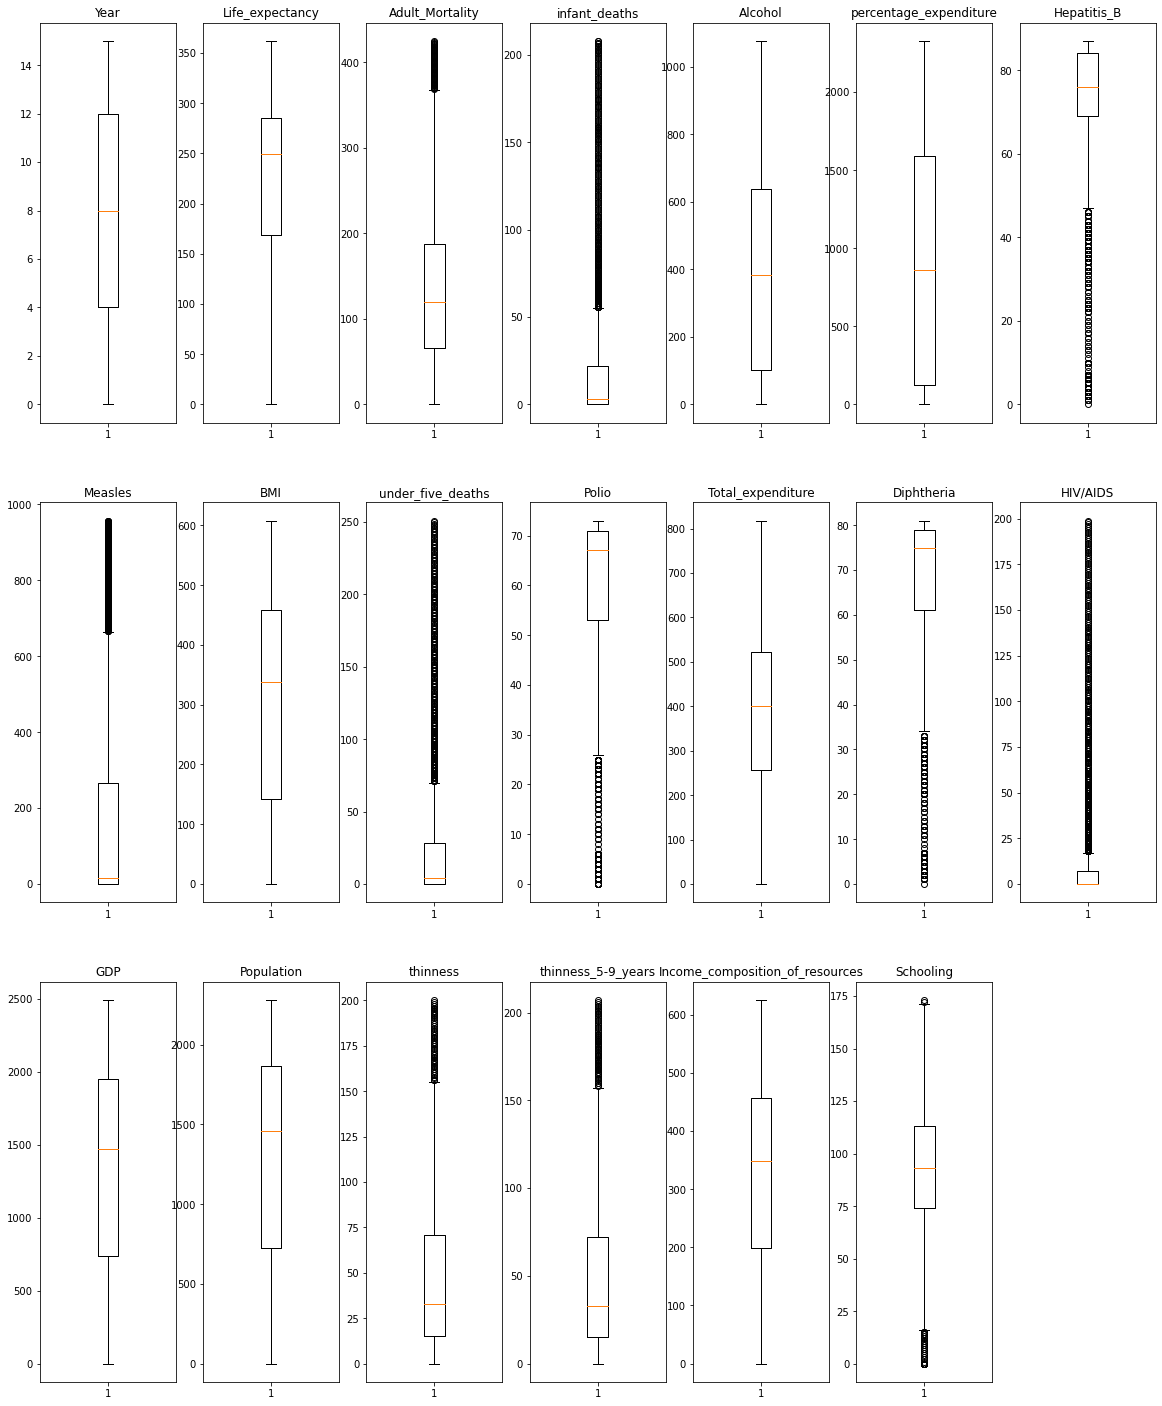

In [39]:
column_dict ={'Year':2, 'Life_expectancy':3, 'Adult_Mortality':4, 'infant_deaths':5,
       'Alcohol':6, 'percentage_expenditure':7, 'Hepatitis_B':8, 'Measles':9, 'BMI':10,
       'under_five_deaths':11, 'Polio':12, 'Total_expenditure':13, 'Diphtheria':14, 'HIV/AIDS':15,
       'GDP':16, 'Population':17, 'thinness':18, 'thinness_5-9_years':19,
       'Income_composition_of_resources':20, 'Schooling':21}

plt.figure(figsize=(20,25))

for feature,i in column_dict.items():
    print(feature)
    plt.subplot(3,7,i-1) #3 cross 7 plot
    plt.boxplot(data[feature])
    plt.title(feature)

plt.savefig(r"C:\Users\jwala\AppData\Roaming\Microsoft\Windows\Start Menu\Programs\Python 3.9\Life Expectancy\static\box_plot_before_outlier_remove.png")
plt.show()

# Removing outliers

In [40]:
q1 = data.quantile(0.25)
q1

Year                                4.000
Life_expectancy                   169.000
Adult_Mortality                    66.000
infant_deaths                       0.000
Alcohol                           101.250
percentage_expenditure            124.250
Hepatitis_B                        69.000
Measles                             0.000
BMI                               142.000
under_five_deaths                   0.000
Polio                              53.000
Total_expenditure                 257.000
Diphtheria                         61.000
HIV/AIDS                            0.000
GDP                               734.250
Population                        727.250
thinness                           15.000
thinness_5-9_years                 15.000
Income_composition_of_resources   199.250
Schooling                          74.000
Name: 0.25, dtype: float64

In [41]:
q3=data.quantile(0.75)
q3

Year                                12.000
Life_expectancy                    285.000
Adult_Mortality                    187.000
infant_deaths                       22.000
Alcohol                            639.000
percentage_expenditure            1592.750
Hepatitis_B                         84.000
Measles                            265.750
BMI                                458.000
under_five_deaths                   28.000
Polio                               71.000
Total_expenditure                  523.000
Diphtheria                          79.000
HIV/AIDS                             7.000
GDP                               1950.000
Population                        1868.000
thinness                            71.000
thinness_5-9_years                  72.000
Income_composition_of_resources    457.000
Schooling                          113.000
Name: 0.75, dtype: float64

In [42]:
IQR = q3-q1
IQR

Year                                 8.000
Life_expectancy                    116.000
Adult_Mortality                    121.000
infant_deaths                       22.000
Alcohol                            537.750
percentage_expenditure            1468.500
Hepatitis_B                         15.000
Measles                            265.750
BMI                                316.000
under_five_deaths                   28.000
Polio                               18.000
Total_expenditure                  266.000
Diphtheria                          18.000
HIV/AIDS                             7.000
GDP                               1215.750
Population                        1140.750
thinness                            56.000
thinness_5-9_years                  57.000
Income_composition_of_resources    257.750
Schooling                           39.000
dtype: float64

In [43]:
a=q1-1.5*IQR

In [44]:
b=q3+1.5*IQR

In [45]:
(data<(q1-1.5*IQR))|(data>(q3+1.5*IQR))

<ipython-input-45-a1f365affcec>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  (data<(q1-1.5*IQR))|(data>(q3+1.5*IQR))
<ipython-input-45-a1f365affcec>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  (data<(q1-1.5*IQR))|(data>(q3+1.5*IQR))


,Adult_Mortality,Alcohol,BMI,Country,Diphtheria,GDP,HIV/AIDS,Hepatitis_B,Income_composition_of_resources,Life_expectancy,...,Population,Schooling,Status,Total_expenditure,Year,infant_deaths,percentage_expenditure,thinness,thinness_5-9_years,under_five_deaths
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2934,True,False,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2935,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2936,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [46]:
data_no_outlier=data[~((data<(q1-1.5*IQR))|(data>(q3+1.5*IQR))).any(axis=1)]

<ipython-input-46-8c1e3c941c00>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data_no_outlier=data[~((data<(q1-1.5*IQR))|(data>(q3+1.5*IQR))).any(axis=1)]
<ipython-input-46-8c1e3c941c00>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data_no_outlier=data[~((data<(q1-1.5*IQR))|(data>(q3+1.5*IQR))).any(axis=1)]


In [47]:
print(data_no_outlier[data_no_outlier['Country']=="India"])

Empty DataFrame
Columns: [Country, Year, Status, Life_expectancy, Adult_Mortality, infant_deaths, Alcohol, percentage_expenditure, Hepatitis_B, Measles, BMI, under_five_deaths, Polio, Total_expenditure, Diphtheria, HIV/AIDS, GDP, Population, thinness, thinness_5-9_years, Income_composition_of_resources, Schooling]
Index: []

[0 rows x 22 columns]


Year
Life_expectancy
Adult_Mortality
infant_deaths
Alcohol
percentage_expenditure
Hepatitis_B
Measles
BMI
under_five_deaths
Polio
Total_expenditure
Diphtheria
HIV/AIDS
GDP
Population
thinness
thinness_5-9_years
Income_composition_of_resources
Schooling


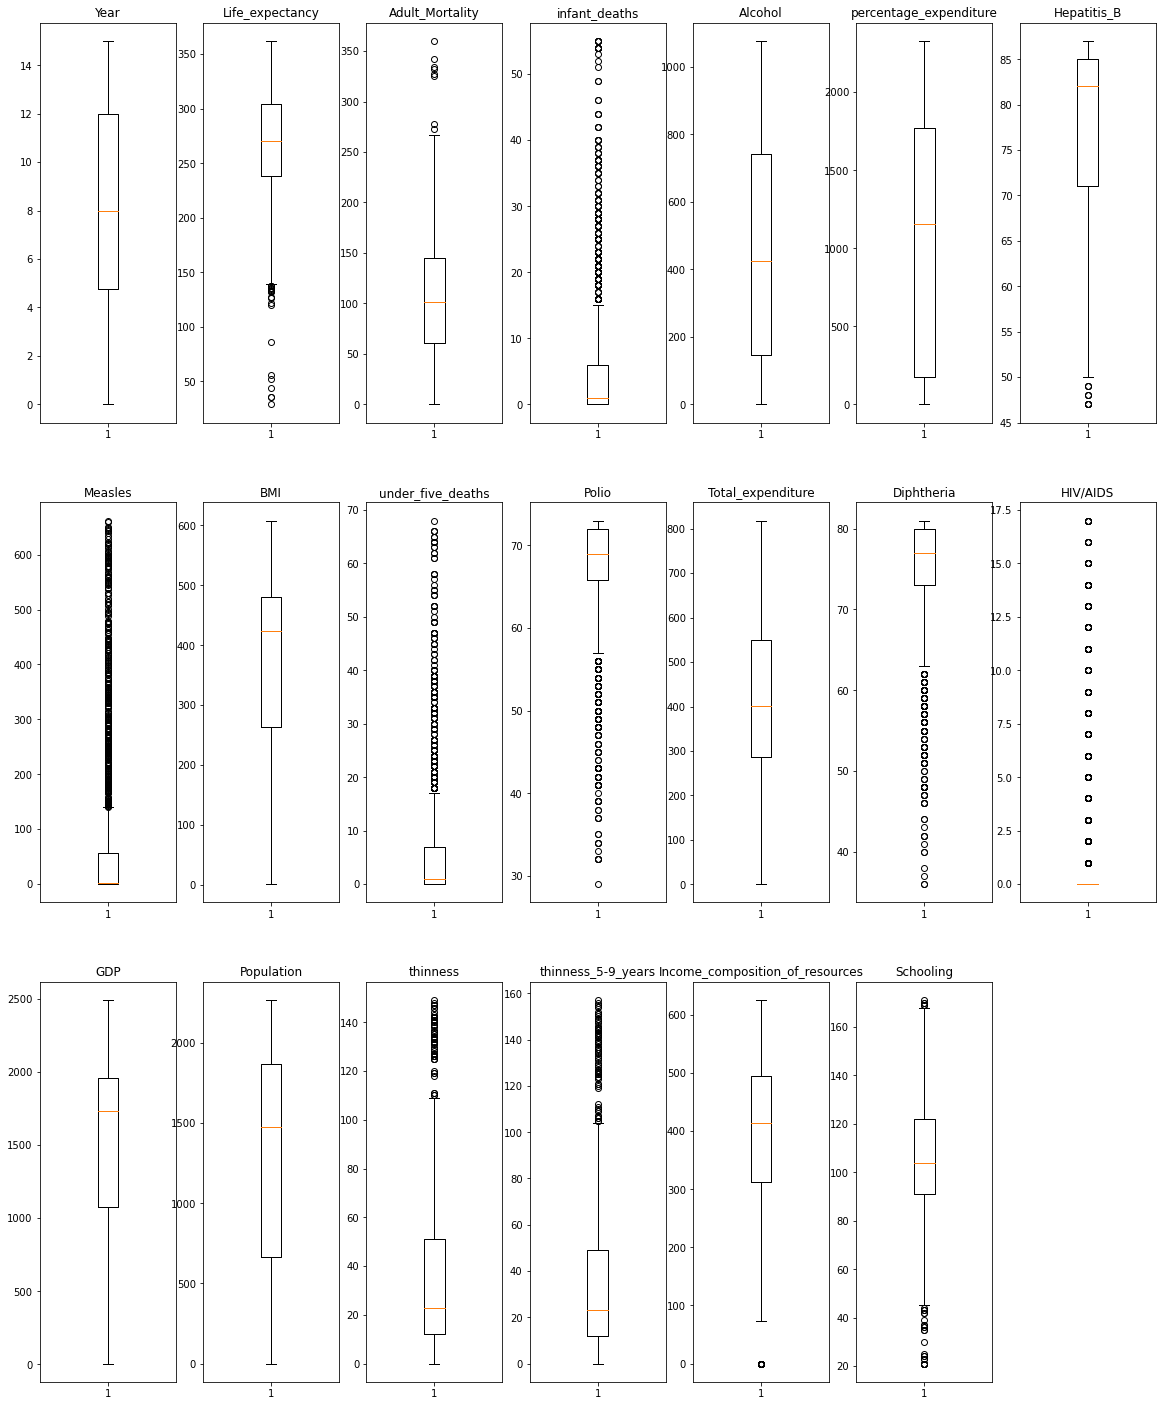

In [48]:
plt.figure(figsize=(20,25))

for feature,i in column_dict.items():
    print(feature)
    plt.subplot(3,7,i-1) #3 cross 7 plot
    plt.boxplot(data_no_outlier[feature])
    plt.title(feature)

plt.savefig(r"C:\Users\jwala\AppData\Roaming\Microsoft\Windows\Start Menu\Programs\Python 3.9\Life Expectancy\static\box_plot_after_outlier_remove.png")
plt.show()

# Regression analysis

DEPENDENT VS INDEPENDENT

Life Expectancy vs. Income Composition of resources 

Life Expectancy VS Schooling

Life Expectancy VS Adult  Morality

Life Expectancy VS Population

In [56]:
def linear_regression(x,y,category):
    m=((len(x)*sum(x*y))-(sum(x)*sum(y)))/((len(x)*sum(x*x))-sum(x)**2)
    c=(sum(y)-m*sum(x))/len(x)
    print("m and c of",category[0],'Vs',category[1],"is",m,c)
    
    y_pred=[]
    for i in range(len(y)):
        y_pred.append(m*y[i]+c)
    
    plt.xlabel(category[0])
    plt.ylabel(category[1])
    plt.title(category[0]+" Vs "+category[1])
    plt.scatter(x,y,c='grey')
    plt.plot(x,m*x+c,color="red")
    plt.ticklabel_format(style='plain')
    plt.gcf().set_size_inches(8,8)
    #plt.xticks(rotation=90)
    plt.savefig(r"C:\Users\jwala\AppData\Roaming\Microsoft\Windows\Start Menu\Programs\Python 3.9\Life Expectancy\static\\"+category[0]+" Vs"+ category[1]+".png",format="png")
    plt.show()

In [57]:
def polynomial_regression(x,y,category):
    poly=PolynomialFeatures(degree=3)
    x_poly=poly.fit_transform(x.reshape(-1,1))
    poly_model=LinearRegression()
    poly_model.fit(x_poly,y.reshape(-1,1))
    y_pred=poly_model.predict(x_poly)

    poly=np.poly1d(np.polyfit(x,y,3))
    print("r2_score of ",category[0],'Vs',category[1],"is",r2_score(y,poly(x)))

    plt.scatter(x,y,c='grey')
    plt.xlabel(category[0])
    plt.ylabel(category[1])
    plt.title(category[0]+" Vs "+category[1])
    plt.plot(x,y_pred,c='red')
    plt.ticklabel_format(style='plain')
    plt.gcf().set_size_inches(8,8)
    #plt.xticks(rotation=90)
    plt.savefig(r"C:\Users\jwala\AppData\Roaming\Microsoft\Windows\Start Menu\Programs\Python 3.9\Life Expectancy\static\\"+"poly_"+category[0]+" Vs"+ category[1]+".png",format="png")
    plt.show()


m and c of Income_composition_of_resources Vs Life_expectancy is 0.2919677134647031 150.9456555560179


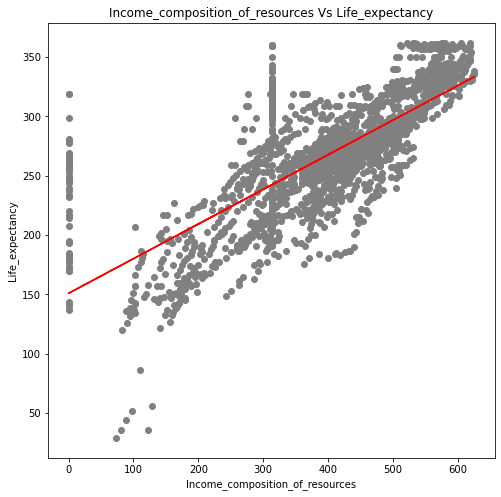

In [58]:
# Life Expectancy vs. Income Composition of resources
linear_regression(data_no_outlier['Income_composition_of_resources'].values,data_no_outlier['Life_expectancy'].values,['Income_composition_of_resources','Life_expectancy'])

m and c of Schooling Vs Life_expectancy is 1.5447890866337208 105.17701535394188


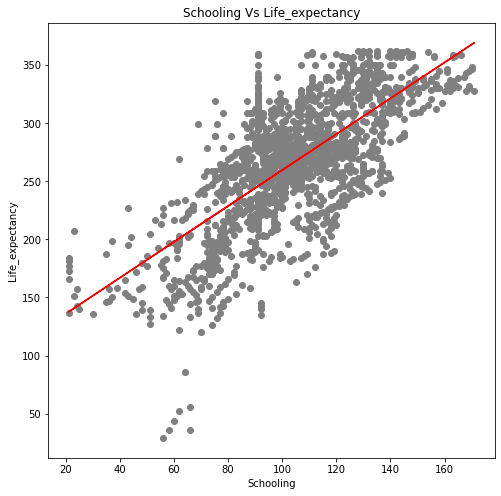

In [59]:
# Life Expectancy vs Schooling
linear_regression(data_no_outlier['Schooling'].values,data_no_outlier['Life_expectancy'].values,['Schooling','Life_expectancy'])

m and c of Adult_Mortality Vs Life_expectancy is -0.5381863813660518 321.9404871840714


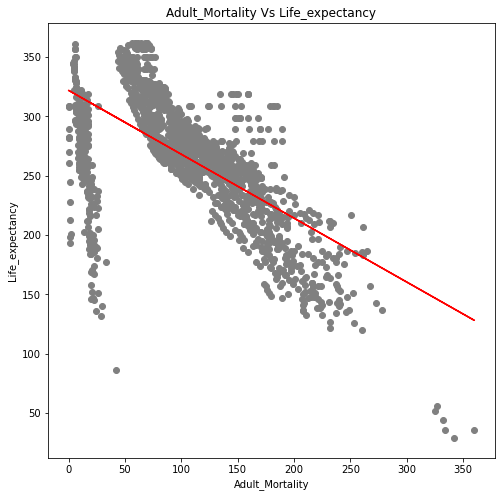

In [60]:
# Life Expectancy vs Adult Mortality
linear_regression(data_no_outlier['Adult_Mortality'].values,data_no_outlier['Life_expectancy'].values,['Adult_Mortality','Life_expectancy'])

m and c of Population Vs Life_expectancy is 0.004828774995635546 260.56946003456886


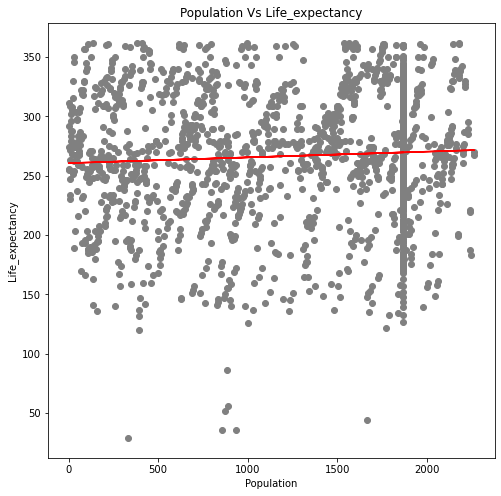

In [61]:
linear_regression(data_no_outlier['Population'].values,data_no_outlier['Life_expectancy'].values,['Population','Life_expectancy'])